In [1]:
!pip install wordcloud

In [2]:
!pip install xgboost

In [3]:
# Basic
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Preprocessing & ML
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
import xgboost as xgb

In [4]:
# Example: two CSVs (Fake.csv, True.csv)
fake = pd.read_csv("/Users/aditi/Downloads/Fake.csv")
true = pd.read_csv("/Users/aditi/Downloads/Real.csv")

fake["label"] = 0  # Fake news
true["label"] = 1  # Real news

# Combine datasets
data = pd.concat([fake, true], axis=0)
data = data.sample(frac=1).reset_index(drop=True)  # Shuffle
data.head()

,title,text,subject,date,label
0,Proposed cuts to State Dept. budget worry Hous...,WASHINGTON (Reuters) - The Republican head of ...,politicsNews,"March 16, 2017",1
1,France criticizes U.S. travel ban on Chadian a...,PARIS (Reuters) - France said on Wednesday it ...,worldnews,"September 27, 2017",1
2,WATCH: 10-YR OLD BOY Offers To Mow White House...,Note to media: If you won t report the good th...,politics,"Aug 2, 2017",0
3,Tone Deaf Trump: Congrats Rep. Scalise On Los...,Donald Trump just signed the GOP tax scam into...,News,"December 20, 2017",0
4,Trump defends attacks on Mexican-American U.S....,WASHINGTON (Reuters) - Presumptive Republican ...,politicsNews,"June 3, 2016",1


In [5]:
# Combine title + text for better context
data["content"] = data["title"] + " " + data["text"]

# Drop unused columns
data = data[["content", "label"]]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    data["content"], data["label"], test_size=0.2, random_state=42   #to particularise the starting point, just a favourite seed no.
)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)   #text to num, common eng words > 70% -> drop
X_train_vec = vectorizer.fit_transform(X_train)      #learn + convert
X_test_vec = vectorizer.transform(X_test)          #test

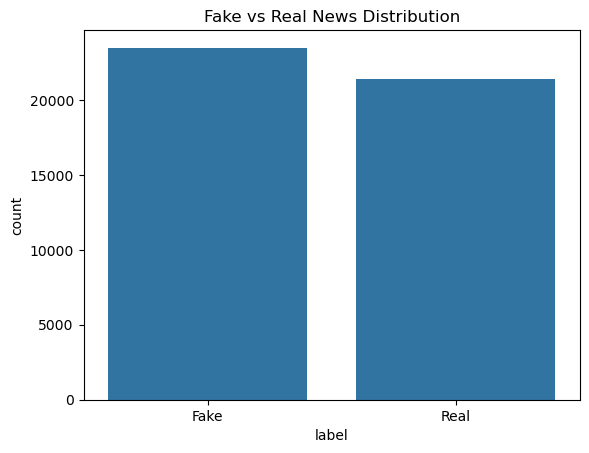

In [8]:
# Distribution of labels
sns.countplot(x=data['label'])        
plt.xticks([0,1], ['Fake', 'Real'])
plt.title("Fake vs Real News Distribution")
plt.show()


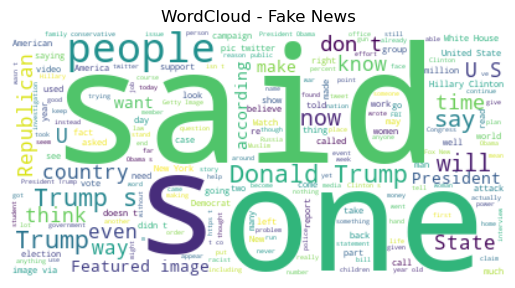

In [10]:
# WordCloud for fake news
fake_text = " ".join(fake["text"])
wc = WordCloud(max_words=200, background_color="white").generate(fake_text)
plt.imshow(wc, interpolation="bilinear") #display
plt.axis("off")
plt.title("WordCloud - Fake News")
plt.show()

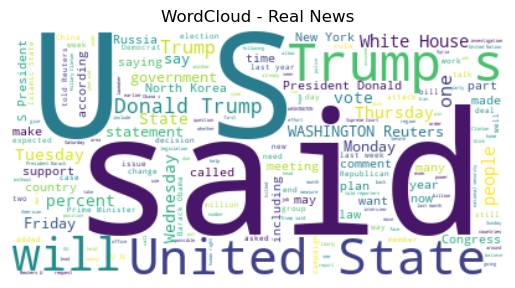

In [11]:
# WordCloud for real news
real_text = " ".join(true["text"])
wc = WordCloud(max_words=200, background_color="white").generate(real_text)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Real News")
plt.show()

In [13]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": LinearSVC(),
    "XGBoost": xgb.XGBClassifier(eval_metric="logloss")
}

results = {}

for name, model in models.items():
    model.fit(X_train_vec, y_train)      #train model using training data
    y_pred = model.predict(X_test_vec)   #test model using testing data
    
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }


                     Accuracy Precision    Recall  F1-Score  \
Logistic Regression   0.98686   0.98371  0.988772  0.986234   
Naive Bayes          0.937416  0.939408  0.928421  0.933882   
Random Forest         0.99098  0.992254  0.988772   0.99051   
SVM                  0.994655  0.993924  0.994854  0.994389   
XGBoost              0.997996  0.997662  0.998129  0.997895   

                               Confusion Matrix  
Logistic Regression    [[4635, 70], [48, 4227]]  
Naive Bayes          [[4449, 256], [306, 3969]]  
Random Forest          [[4672, 33], [48, 4227]]  
SVM                    [[4679, 26], [22, 4253]]  
XGBoost                 [[4695, 10], [8, 4267]]  


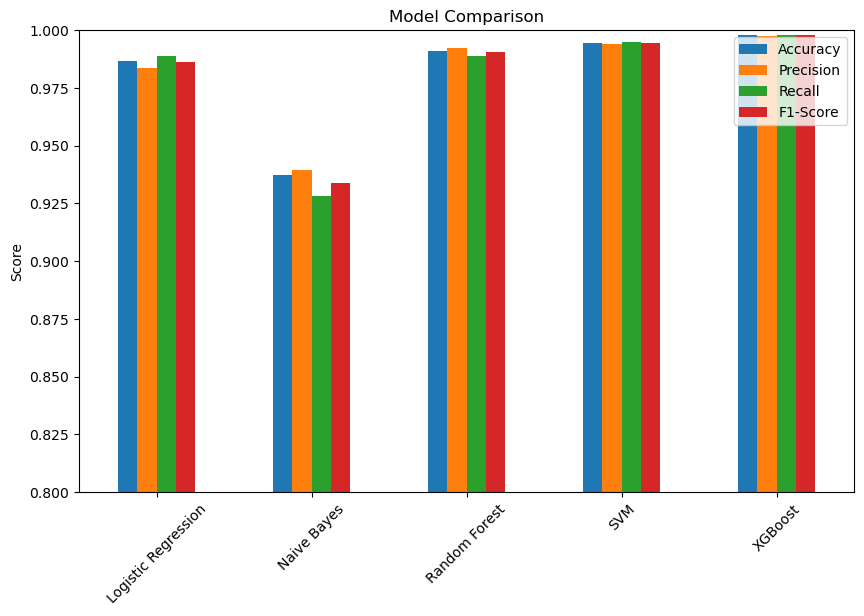

In [14]:
# Show results in table
results_df = pd.DataFrame(results).T
print(results_df)

# Plot bar chart comparison
results_df[["Accuracy", "Precision", "Recall", "F1-Score"]].plot(kind="bar", figsize=(10,6))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.ylim(0.8, 1.0)  # zoom in
plt.xticks(rotation=45)    # no overlap
plt.show()

In [15]:
best_model = results_df["F1-Score"].idxmax()
print(f"The best model is: {best_model} with F1-Score: {results_df.loc[best_model, 'F1-Score']:.4f}")

The best model is: XGBoost with F1-Score: 0.9979
